# Imports

In [1]:
import sys
import os
import numpy as np
import matplotlib.pyplot as plt

PROJECT_ROOT = os.path.abspath(os.path.join(os.getcwd(), ".."))
if PROJECT_ROOT not in sys.path:
    sys.path.insert(0, PROJECT_ROOT)

from utils.data import load_breast_cancer_kagglehub, standardize_fit_transform
from utils.metrics import silhouette_score
from PCA.pca_numpy import PCA
from KMeans.kmeans_numpy import KMeans

# Load and standardize dataset

In [2]:
X, y, feature_names = load_breast_cancer_kagglehub()
Xs, scaler = standardize_fit_transform(X)

Loaded CSV: C:\Users\Wind\.cache\kagglehub\datasets\uciml\breast-cancer-wisconsin-data\versions\2\data.csv


# PCA + K-Means evaluation

In [3]:
components_list = [2, 5, 10, 15, 20]
k = 2

recon_errors = []
sil_scores = []

for m in components_list:
    pca = PCA(n_components=m, random_state=42)
    Z = pca.fit_transform(Xs)

    km = KMeans(n_clusters=k, init="kmeans++", random_state=42)
    labels = km.fit_predict(Z)

    rec_err = pca.reconstruction_error(Xs)
    sil = silhouette_score(Z, labels)

    recon_errors.append(rec_err)
    sil_scores.append(sil)

    print(f"Components={m}: Recon MSE={rec_err:.6f}, Silhouette={sil:.4f}")

Components=2: Recon MSE=0.367568, Silhouette=0.5085
Components=5: Recon MSE=0.152657, Silhouette=0.3932
Components=10: Recon MSE=0.048431, Silhouette=0.3577
Components=15: Recon MSE=0.013512, Silhouette=0.3481
Components=20: Recon MSE=0.004428, Silhouette=0.3459


# Reconstruction error vs PCA components

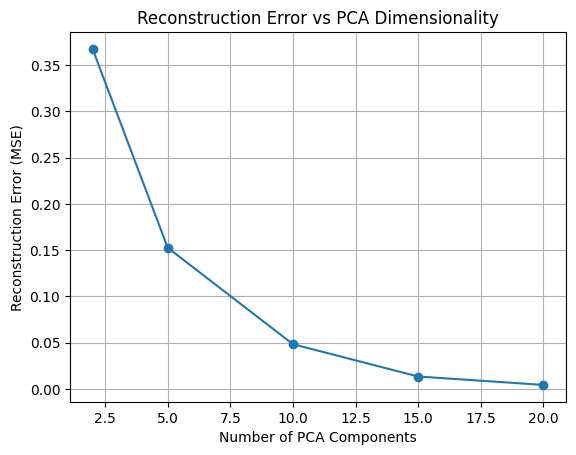

In [4]:
plt.figure()
plt.plot(components_list, recon_errors, marker='o')
plt.xlabel("Number of PCA Components")
plt.ylabel("Reconstruction Error (MSE)")
plt.title("Reconstruction Error vs PCA Dimensionality")
plt.grid(True)
plt.show()

# Silhouette score vs PCA components

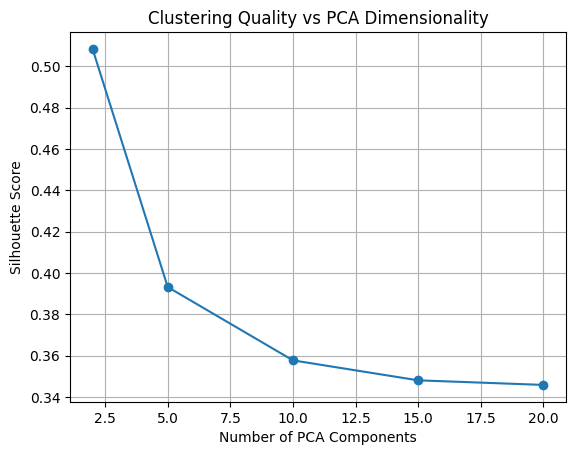

In [5]:
plt.figure()
plt.plot(components_list, sil_scores, marker='o')
plt.xlabel("Number of PCA Components")
plt.ylabel("Silhouette Score")
plt.title("Clustering Quality vs PCA Dimensionality")
plt.grid(True)
plt.show()